## Data cleaning and preprocessing

Data cleaning steps
1. Clean body of each dataset, exctracting just the words
2. Remove non-english rows using langdetect
3. Combine all datasets

We only combine in the last step as the datasets are large.

In [49]:
import pandas as pd
import re
import gdown

Downloading the raw datasets from the google drive:

In [ ]:
https://drive.google.com/file/d/1R3olDW5JQVuu_nDoYqIs80GUb0kJMMwG/view?usp=share_link

In [62]:
#emails.csv
emails_id = '1R3oLDW5JQVuu_nDoYqIs8QGUb0kJMMvG'
emails_url = f'https://drive.google.com/uc?id={emails_id}'
gdown.download(emails_url,'emails.csv', fuzzy=True, quiet=False)

# TREC_07
trec_url = f'https://drive.google.com/uc?id=1Unw85XdkPItLzpFexBA8pVJMg-evWj9B'
gdown.download(trec_url, 'TREC_07.csv', fuzzy=True, quiet=False)

# CEAS_08
ceas_url = f'https://drive.google.com/uc?id=1LCoXjr4f4fSlDC7eMXmcVGu89iQtGAXK'
gdown.download(ceas_url, "CEAS_08.csv", fuzzy=True, quiet=False)

# Enron
enron_url = f'https://drive.google.com/uc?id=1omZZiIfnmr8zg7ZE8s-EXiNlm955mN4v'
gdown.download(enron_url, "Enron.csv", fuzzy=True, quiet=False)

# Spam Ham Dataset
spam_ham_url = f'https://drive.google.com/uc?id=1Tkwnt3INrsYiSGLJlSbROvn2e-N9fKsi'
gdown.download(spam_ham_url, "spam_ham_dataset.csv",fuzzy=True, quiet=False)

# Ling
ling_url = f'https://drive.google.com/uc?id=1NBJ7bJqeekfxZT1_9l1ztVqJzxlOx3MX'
gdown.download(ling_url, "Ling.csv", fuzzy=True, quiet=False)

# Nigerian_5
nigerian_url = f'https://drive.google.com/uc?id=1Qlh2KH1D48LAPTJKC0GC24KXFqljJmLs'
gdown.download(nigerian_url, "Nigerian_5.csv", fuzzy=True, quiet=False)

# Spam Assasin
spam_assasin_url = f'https://drive.google.com/uc?id=15KF--v1DR_PJ5xT4ES_Bn2iQWzXZkByJ'
gdown.download(spam_assasin_url, "SpamAssasin.csv", fuzzy=True, quiet=False)

# Nazario_5
nazario_url = f'https://drive.google.com/uc?id=1M6Si8zcSnnr3zTFnlIHz6ZwuUe8WrvRC'
gdown.download(nazario_url, "Nazario_5.csv", fuzzy=True, quiet=False)



FileURLRetrievalError: Failed to retrieve file url:

	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses.
	Check FAQ in https://github.com/wkentaro/gdown?tab=readme-ov-file#faq.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?id=1R3oLDW5JQVuu_nDoYqIs8QGUb0kJMMvG

but Gdown can't. Please check connections and permissions.

In [44]:
def cleaning(text):

    # Ensure correct data type
    text = str(text) 

    # Lowercasing
    text = text.lower()
    
    text = re.sub(r'^(from|to|cc|bcc|subject|sent|date):.*?\n', '', text, flags=re.MULTILINE | re.IGNORECASE) # Remove email headers
    text = re.sub(r"https?://\S+|www\.\S+", "", text)  # Remove URLs
    text = re.sub(r"^(subject: re :|subject:)\s*", "", text) # Remove repetitive words
    text = re.sub(r"[^a-z\s]", "", text)  # Keep only alphabets and spaces (removes non-Latin characters like Chinese, Korean)
    text = re.sub("\n", " ", text) # Remove new line indicator
    text = re.sub(r'\s+', ' ', text).strip() # Remove excessive whitespace

    return text

In [45]:
# pip install langdetect

In [46]:
from langdetect import detect
from langdetect.lang_detect_exception import LangDetectException

In [47]:
def get_language(text):
    try:
        cleaned_text = str(text).strip()
        if not cleaned_text:
            return 'empty' 
        lang = detect(cleaned_text)
        return lang
    
    except LangDetectException:
        # cannto detect language
        return 'unknown'
    
    except Exception as e:
        # in case of unexpected error
        return 'error'

In [50]:
df = pd.read_csv("emails.csv")
df['body'] = df['text']
df['label'] = df['spam']
df['cleaned_body'] = df['body'].apply(cleaning)
df['language'] = df['cleaned_body'].apply(get_language)

FileNotFoundError: [Errno 2] No such file or directory: 'emails.csv'

In [ ]:
df['language'].value_counts()

language
en    5672
pl      27
fr       6
nl       4
de       3
it       2
sw       2
pt       2
sv       2
es       2
tr       1
so       1
cy       1
no       1
af       1
sl       1
Name: count, dtype: int64

In [ ]:
df[df['language'] != 'en'].sample(5) # checking

,text,spam,body,label,cleaned_body,language
3498,"Subject: re : zakup ksiazki "" inzynieria finan...",0,"Subject: re : zakup ksiazki "" inzynieria finan...",0,zakup ksiazki inzynieria finansowa w wnt pani ...,pl
1804,"Subject: term paper stuart , i cannot open y...",0,"Subject: term paper stuart , i cannot open y...",0,term paper stuart i cannot open your attachmen...,sv
5318,Subject: pd : praca dyplomowa v edycja mba ? ...,0,Subject: pd : praca dyplomowa v edycja mba ? ...,0,pd praca dyplomowa v edycja mba original messa...,pl
1705,Subject: re : fwd : praca dyplomowa v edycja m...,0,Subject: re : fwd : praca dyplomowa v edycja m...,0,fwd praca dyplomowa v edycja mba warszawa pani...,pl
592,Subject: free lancer eventos free lancer even...,1,Subject: free lancer eventos free lancer even...,1,free lancer eventos free lancer eventos servio...,pt


In [ ]:
df1 = df.loc[df['language'] == 'en', ['body','cleaned_body', 'label']]
df1.sample(2)

,body,cleaned_body,label
5383,Subject: re : recommendation of an outstanding...,recommendation of an outstanding baylor mba st...,0
1552,"Subject: best picks hey , best picks are zig...",best picks hey best picks are zigo and smtx steve,0


In [ ]:
df = pd.read_csv("../data/raw/spam_ham_dataset.csv")
df['body'] = df['text']
df['label'] = df['label_num']
df['cleaned_body'] = df['body'].apply(cleaning)
df['language'] = df['cleaned_body'].apply(get_language)

In [ ]:
df['language'].value_counts()

language
en       4898
empty     110
ca         54
es         25
nl         16
fr         15
de          9
cy          8
cs          4
pt          3
fi          3
sk          3
it          3
hu          2
sl          2
da          2
id          2
et          2
pl          2
hr          1
af          1
sv          1
lt          1
tr          1
sq          1
sw          1
so          1
Name: count, dtype: int64

In [ ]:
df.loc[4407]['body'] # we can see that the cleaned body is empty as the body only had subject without content so we can remove them

'Subject: discreet cheapest pr ! escription d \\ rugs online !\r\n'

In [ ]:
df[df['language'] == 'empty'].sample(2)

,Unnamed: 0,label,text,label_num,body,cleaned_body,language
4407,3906,1,Subject: discreet cheapest pr ! escription d \...,1,Subject: discreet cheapest pr ! escription d \...,,empty
3225,4442,1,Subject: you can be smart !\r\n,1,Subject: you can be smart !\r\n,,empty


In [ ]:
df2 = df.loc[df['language'] == 'en', ['body','cleaned_body', 'label']] # removes all entries that are not english
df2.sample(2)

,body,cleaned_body,label
861,"Subject: re : 98 - 6719 and 98 - 9676\r\nyes ,...",yes it is a gtc spot daren j farmer pm to juli...,0
723,Subject: net out with kinder morgan - beginnin...,megan kim please make a note that we did a dea...,0


In [ ]:
df = pd.concat([df1,df2], ignore_index=True)

""""
df = pd.read_csv("../raw/spam_ham_dataset.csv")
df['body'] = df['text']
df['label'] = df['label_num']
df['cleaned_body'] = df['body'].apply(cleaning)
df['language'] = df['cleaned_body'].apply(get_language)
df1 = df.loc[df['language'] == 'en', ['body','cleaned_body', 'label']]
"""

lst_standard_datasets = ["CEAS_08.csv", "Enron.csv", "Ling.csv", "SpamAssasin.csv", "TREC_07.csv", "Nigerian_5.csv", "Nazario_5.csv"]

for dataset in lst_standard_datasets:
    temp_df = pd.read_csv("../data/raw/"+dataset)[['body','label']]
    temp_df['cleaned_body'] = temp_df['body'].apply(cleaning)
    temp_df['language'] = temp_df['cleaned_body'].apply(get_language)
    df = pd.concat([df, temp_df.loc[temp_df['language'] == 'en', ['body', 'cleaned_body', 'label']]], ignore_index=True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149378 entries, 0 to 149377
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   body          149378 non-null  object
 1   cleaned_body  149378 non-null  object
 2   label         149378 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 3.4+ MB


In [ ]:
df.sample(5)

,body,cleaned_body,label
87023,Anatrim � The newest and most fascinating fles...,anatrim the newest and most fascinating flesh ...,1
83672,Liam Bedford stated the following:\n> \n> On W...,liam bedford stated the following on wed jul s...,0
107346,\n\n\n\n\n\nYour credit doesn't matter to us!\...,your credit doesnt matter to us if you own rea...,1
95595,"Hi yitzle,\n\nThe reason to escape @ inside a ...",hi yitzle the reason to escape inside a double...,0
142989,"\nFROM THE DESK OF BILL AND EXCHANGE MANAGER,\...",from the desk of bill and exchange manager dr ...,1


In [ ]:
df.isna().sum()

body            0
cleaned_body    0
label           0
dtype: int64

In [ ]:
df['cleaned_body'].duplicated().sum()

23438

In [ ]:
df.drop_duplicates(subset = ['cleaned_body'], inplace=True)
df['cleaned_body'].duplicated().sum()

0

In [ ]:
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

## Feature Engineering (POS Tagging) (needs to be done before the words are preprocessed where there's inevitable removal of some info)

Explanation:
The order of POS tags might be a strong signal. Certain patterns might be more common in spam messages than in legitimate texts. For example:
1. direct commands followed by a noun. POS Tag sequence: Verb (VB*) → Determiner (DT) → Noun (NN*) E.g. "Claim this prize (now!)"
2. aggressively combining adjectives with action-driven verbs. POS Tag sequence: Verb (VB*) → Adjective (JJ) → Noun (NN*) E.g. "Get amazing rewards (today!)"
3. use of urgency-driven modals. POS Tag sequence: Noun (NN/NNS) → Modal Verb (MD) → Verb (VB) E.g. "You must act (now!)"

Assumptions made: Minimal spelling errors made, sentences are grammatically accurate and nltk's `pos_tag()` function is reliable

In [ ]:
##############################################
#              ADDED POS TAGGING HERE
##############################################

def get_pos_tags(text): #str -> list of POS tags 
    try:
        tokens = nltk.word_tokenize(text)
        tags = [tag for word, tag in nltk.pos_tag(tokens)]
        return tags
    except Exception:
        return [] # Handle potential errors

def count_vb_dt_nn(pos_tags):
    """
    Counts occurrences of the POS tag sequence: 
    - VB* (any verb form) 
    - DT (determiner) 
    - NN* (any noun form)
    """
    pattern = re.compile(r'VB\w* DT NN\w*')  # Regex to match VB* -> DT -> NN*
    # Convert list into a space-separated string of POS tags
    pos_sequence = " ".join(pos_tags)
    # Find all matches
    matches = pattern.findall(pos_sequence)
    return len(matches)

def count_vb_jj_nn(pos_tags):
    """
    Counts occurrences of the POS tag sequence: 
    - VB* (any verb form) 
    - JJ (adjective) 
    - NN* (any noun form)
    """
    pattern = re.compile(r'VB\w* JJ NN\w*')
    # Convert list into a space-separated string of POS tags
    pos_sequence = " ".join(pos_tags)
    # Find all matches
    matches = pattern.findall(pos_sequence)
    return len(matches)

def count_nn_md_vb(pos_tags):
    """
    Counts occurrences of the POS tag sequence: 
    - NN* (any noun form) 
    - MD (modal e.g. must, should) 
    - VB* (any verb form)
    """
    pattern = re.compile(r'NN\w* MD VB\w*') 
    # Convert list into a space-separated string of POS tags
    pos_sequence = " ".join(pos_tags)
    # Find all matches
    matches = pattern.findall(pos_sequence)
    return len(matches)

##############################################
#           ADDED POS TAGGING HERE
##############################################

df['pos_tags'] = df['cleaned_body'].apply(get_pos_tags)
df['percentage_vb_dt_nn'] = (df['pos_tags'].apply(count_vb_dt_nn)) / (df['pos_tags'].apply(len)) * 100
df['percentage_vb_jj_nn'] = (df['pos_tags'].apply(count_vb_jj_nn)) / (df['pos_tags'].apply(len)) * 100
df['percentage_nn_md_vb'] = (df['pos_tags'].apply(count_nn_md_vb)) / (df['pos_tags'].apply(len)) * 100

In [ ]:
subject_start = df['cleaned_body'].str.startswith('subject')
df.loc[subject_start, 'cleaned_body'] = df.loc[subject_start, 'cleaned_body'].apply(lambda x: x[len('subject'):].lstrip())
df.head()

,body,cleaned_body,label,pos_tags,percentage_vb_dt_nn,percentage_vb_jj_nn,percentage_nn_md_vb,tokens
0,Subject: naturally irresistible your corporate...,naturally irresistible your corporate identity...,1,"[RB, JJ, PRP$, JJ, NN, NN, VBZ, RB, JJ, TO, VB...",3.743316,2.139037,1.069519,"[naturally, irresistible, corporate, identity,..."
1,Subject: the stock trading gunslinger fanny i...,the stock trading gunslinger fanny is merrill ...,1,"[DT, NN, NN, NN, NN, VBZ, RB, CC, VBZ, RB, JJ,...",0.000000,0.000000,0.000000,"[stock, trading, gunslinger, fanny, merrill, m..."
2,Subject: unbelievable new homes made easy im ...,unbelievable new homes made easy im wanting to...,1,"[JJ, JJ, NNS, VBN, JJ, JJ, VBG, TO, VB, PRP, D...",1.351351,0.000000,0.000000,"[unbelievable, new, home, made, easy, im, want..."
3,Subject: 4 color printing special request add...,color printing special request additional info...,1,"[NN, VBG, JJ, NN, JJ, NN, RB, VBZ, RB, NN, RB,...",1.562500,4.687500,0.000000,"[color, printing, special, request, additional..."
4,"Subject: do not have money , get software cds ...",do not have money get software cds from here s...,1,"[VBP, RB, VB, NN, NN, NN, NNS, IN, RB, NN, NN,...",2.564103,2.564103,0.000000,"[money, get, software, cd, software, compatibi..."


## Data preprocessing steps
1. Tokenization
2. Remove stop words
3. Lemmatization
-- we choose to perform lemmatization instead of stemming to identify the original meaning of the word

In [ ]:


stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()
    
def preprocess(text):
    words = word_tokenize(text)
    
    # Remove stopwords
    words = [word for word in words if word not in stop_words]
    
    # Lemmatization
    words = [lemmatizer.lemmatize(word) for word in words]

    return words

df['tokens'] = df['cleaned_body'].apply(preprocess)


In [ ]:
print(subject_start.sum())
#df.head(5)

0


In [ ]:
df.to_csv('../data/processed/full_df.csv', index = False)

Split into training and testing sets

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
labels = df['label'].tolist()

In [ ]:
df_copy = df
clean_content = df_copy['cleaned_body'].to_list(); clean_content[:10]

['naturally irresistible your corporate identity lt is really hard to recollect a company the market is full of suqgestions and the information isoverwhelminq but a good catchy logo stylish statlonery and outstanding website will make the task much easier we do not promise that havinq ordered a iogo your company will automaticaily become a world ieader it isguite ciear that without good products effective business organization and practicable aim it will be hotat nowadays market but we do promise that your marketing efforts will become much more effective here is the list of clear benefits creativeness hand made original logos specially done to reflect your distinctive company image convenience logo and stationery are provided in all formats easy to use content management system letsyou change your website content and even its structure promptness you will see logo drafts within three business days affordability your marketing break through shouldn t make gaps in your budget satisfacti

In [ ]:
# split test and train 80-20
train_df, test_df = train_test_split(df, test_size=0.20, random_state=4263, stratify=df_copy['label'])

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

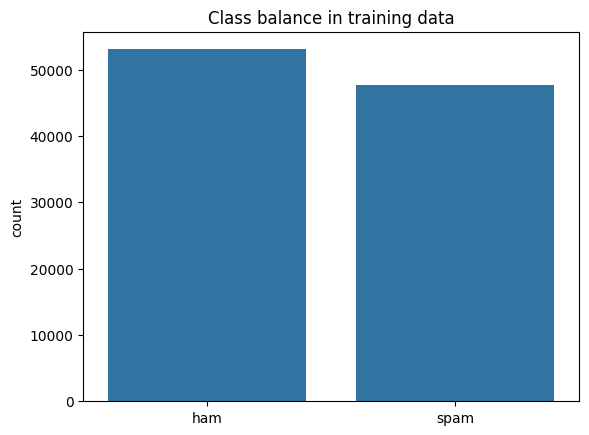

In [ ]:
count = train_df['label'].value_counts()
labels = {0:'ham', 1:'spam'}

ax = sns.barplot(x = labels, y = count).set_title("Class balance in training data")

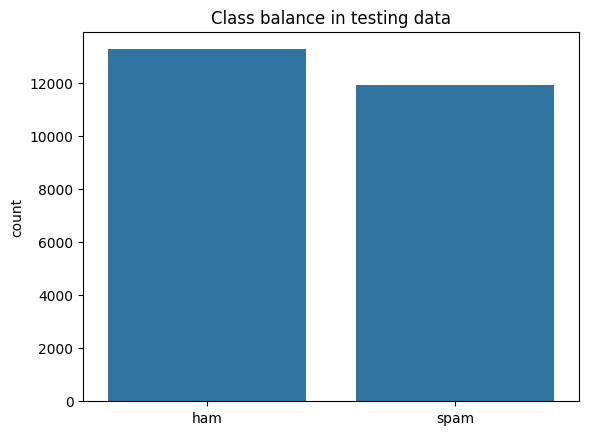

In [ ]:
count = test_df['label'].value_counts()
labels = {0:'ham', 1:'spam'}

ax = sns.barplot(x = labels, y = count).set_title("Class balance in testing data")

In [ ]:
train_df.to_csv('../data/processed/training.csv', index = False)
test_df.to_csv('../data/processed/testing.csv', index = False)